<a href="https://colab.research.google.com/github/Giftegbeke/dsn-hackathon/blob/main/DSN_Hackanthon_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
df=pd.read_csv('train.csv')
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [ ]:
df=pd.read_csv('/content/train.csv')
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


##Data Preprocessing and Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [ ]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
#Fill missing data

cat_cols=df.select_dtypes(include='object').columns

for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


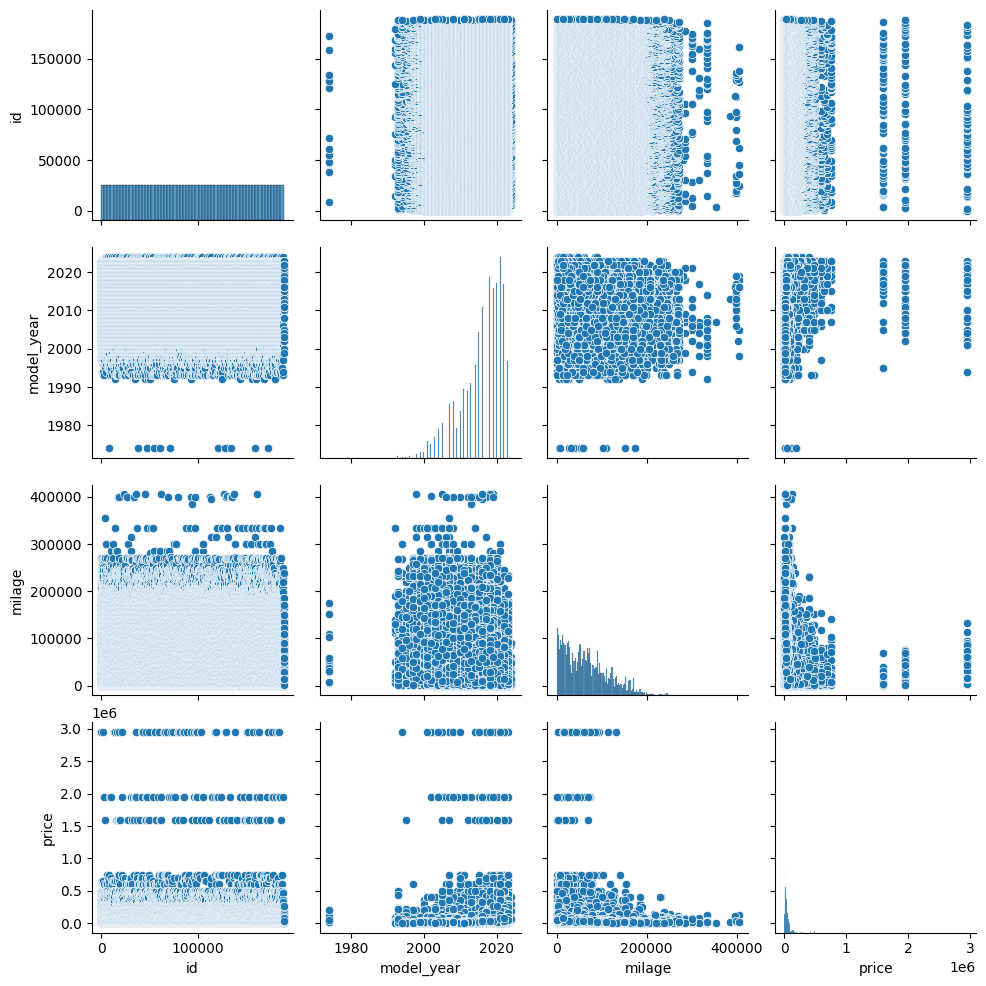

In [ ]:
#Visualize relationship between numerical columns

sns.pairplot(df)
plt.show()

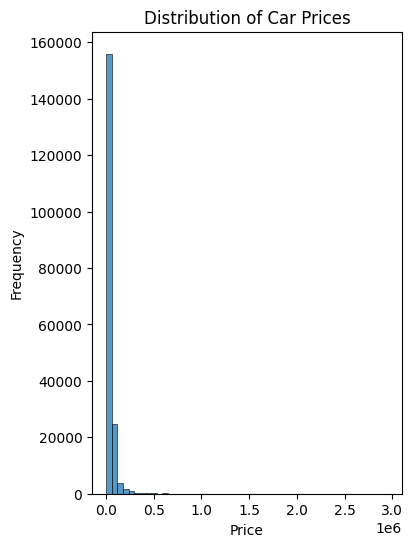

In [ ]:
# Visualize the distribution of the target variable

plt.figure(figsize=(4, 6))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_brand=LabelEncoder()
le_model=LabelEncoder()
le_fuel_type=LabelEncoder()
le_engine=LabelEncoder()
le_transmission=LabelEncoder()
le_ext_col=LabelEncoder()
le_int_col=LabelEncoder()
le_accident=LabelEncoder()
le_clean_title=LabelEncoder()

df['brand']=le_brand.fit_transform(df['brand'])
df['model']=le_model.fit_transform(df['model'])
df['fuel_type']=le_fuel_type.fit_transform(df['fuel_type'])
df['engine']=le_engine.fit_transform(df['engine'])
df['transmission']=le_transmission.fit_transform(df['transmission'])
df['ext_col']=le_ext_col.fit_transform(df['ext_col'])
df['int_col']=le_int_col.fit_transform(df['int_col'])
df['accident']=le_accident.fit_transform(df['accident'])
df['clean_title']=le_clean_title.fit_transform(df['clean_title'])

In [ ]:
import pickle

encoders = {
    "brand": le_brand,
    "model": le_model,
    "fuel_type": le_fuel_type,
    "engine": le_engine,
    "transmission": le_transmission,
    "ext_col": le_ext_col,
    "int_col": le_int_col,
    "accident": le_accident,
    "clean_title": le_clean_title
}

with open("encoders 2.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [ ]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,4,36,1077,2021,7388,2,259,23,29,10,1,0,97500


#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(columns=['price'])
y=df['price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150826, 12)
(150826,)
(37707, 12)
(37707,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train on Decision Tree Regressor

In [ ]:
dt=DecisionTreeRegressor(random_state=42)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
# Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [ ]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_dt.best_params_)

print("Best CV R2:", grid_dt.best_score_)

best_mse = -grid_dt.best_score_
print("Best CV MSE:", best_mse)


Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV R2: -5639305076.354945
Best CV MSE: 5639305076.354945


In [ ]:
dt_y_pred = grid_dt.predict(X_test)
dt_y_pred

array([57670.70959239, 25082.96484795, 42789.54659249, ...,
       25082.96484795, 11591.12995584, 65394.39351728])

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, dt_y_pred))
print("R2 Score:", r2_score(y_test, dt_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_y_pred)))

Mean Squared Error: 4780413666.050637
R2 Score: 0.14038897820234042
RMSE: 69140.53562166436


In [ ]:
import joblib

joblib.dump(grid_dt, 'DT-DSN-model.pkl')

['DT-DSN-model.pkl']

#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}



In [ ]:
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

print("Best Ridge alpha:", grid_ridge.best_params_)
print("Best Ridge MSE:", grid_ridge.best_score_)


Best Ridge alpha: {'alpha': 100}
Best Ridge MSE: -5758457575.097674


In [ ]:
grid_ridge_pred = grid_ridge.predict(X_test)
grid_ridge_pred

array([63285.0426358 , 30734.46978469, 31792.23745354, ...,
       31798.20279153,  9576.43845311, 47061.15343314])

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, grid_ridge_pred))
print("R2 Score:", r2_score(y_test, grid_ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, grid_ridge_pred)))

Mean Squared Error: 4942265882.066814
R2 Score: 0.11128481305907056
RMSE: 70301.25092817919


In [ ]:
import joblib

joblib.dump(grid_ridge, 'GridRidge-DSN-model.pkl')

['GridRidge-DSN-model.pkl']

#Prediction on Test Data

In [ ]:
import pandas as pd

test_df = pd.read_csv('/content/test.csv')
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [ ]:
import joblib

with open('/content/DT-DSN-model.pkl', 'rb') as f:
    model = joblib.load(f)

In [ ]:
import joblib

with open('/content/encoders.pkl', 'rb') as f:
    encoders = joblib.load(f)

In [ ]:
for col, le in encoders.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].apply(lambda x: x if x in le.classes_ else "unknown")

        if "unknown" not in le.classes_:
            import numpy as np
            le.classes_ = np.append(le.classes_, "unknown")

        test_df[col] = le.transform(test_df[col])


In [ ]:
prediction = model.predict(test_df)
prediction_rounded = prediction.round(2)

In [ ]:
#Build the submission DataFrame
submission = pd.DataFrame({
    "id": test_df["id"],
    "price": prediction_rounded
})

In [ ]:
submission.to_csv("Submission.csv", index=False)

#Deployment

In [ ]:
import joblib

model=joblib.load('/content/DT-DSN-model.pkl')

In [ ]:
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
def predict_price(id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title):
  input_data=np.array([[id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title]])
  price=model.predict(input_data)
  return f"{price:, .2f}"


In [ ]:
import gradio as gr

iface=gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label='ID'),
        gr.Number(label='Brand'),
        gr.Number(label='Model'),
        gr.Number(label='Model Year'),
        gr.Number(label='Milage'),
        gr.Number(label='Fuel Type'),
        gr.Number(label='Engine'),
        gr.Number(label='Transmission'),
        gr.Number(label='Ext Col'),
        gr.Number(label='Int Col'),
        gr.Number(label='Accident'),
        gr.Number(label='Clean Title')
    ],
    outputs=gr.Text(label='Predicted Price'),
    title='Car Price Prediction',
    description='Enter the required details to predict the price of the car'
)
iface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a59c9b0f3b48ae4954.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a59c9b0f3b48ae4954.gradio.live
